In [1]:
import matplotlib.pyplot as plt
from matplotlib import rc
from plotutils import *
rc('text', usetex=True)

In [2]:
def collect_time(df_dict):
    lst = []
    for key in df_dict.keys():
        df_ = df_dict[key]
        time_ = np.sum(df_['time'])
        lst.append(time_)
    return lst
date = '09_19_2021'
tol = 1e-6

In [18]:
schimdt = get_all(logdir='../IPG/test/log', date=date, inexact_type='schimdt', loss='logit', use_ckpt=True, tol = tol, 
        lam_shrink=[0.1, 0.01], group_size=[10, 100], overlap_ratio=[0.1, 0.2, 0.3], excludes=['madelon'], param_lst=[1e0, 1e1, 1e2, 1e3, 1e4])
schimdt_time = collect_time(schimdt)

schimdt-1.0
 61/72 instances terminate with status:  1
  1/72 instances terminate with status:  4
 10/72 instances terminate with status:  0
schimdt-10.0
 71/72 instances terminate with status:  1
  1/72 instances terminate with status:  4
schimdt-100.0
 72/72 instances terminate with status:  1
schimdt-1000.0
 72/72 instances terminate with status:  1
schimdt-10000.0
 72/72 instances terminate with status:  1


In [4]:
lee = get_all(logdir='../IPG/test/log', date=date, inexact_type='lee', loss='logit', use_ckpt=True, tol = tol, 
        lam_shrink=[0.1, 0.01], group_size=[10, 100], overlap_ratio=[0.1, 0.2, 0.3], excludes=['madelon'], param_lst=[0.1, 0.2, 0.3, 0.4, 0.5])
lee_time = collect_time(lee)

lee-0.1
 70/72 instances terminate with status:  0
  2/72 instances terminate with status:  4
lee-0.2
 70/72 instances terminate with status:  0
  2/72 instances terminate with status:  4
lee-0.3
 70/72 instances terminate with status:  0
  2/72 instances terminate with status:  4
lee-0.4
 70/72 instances terminate with status:  0
  2/72 instances terminate with status:  4
lee-0.5
 70/72 instances terminate with status:  0
  2/72 instances terminate with status:  4


In [5]:
yd = get_all(logdir='../IPG/test/log', date=date, inexact_type='yd', loss='logit', use_ckpt=True, tol = tol, 
        lam_shrink=[0.1, 0.01], group_size=[10, 100], overlap_ratio=[0.1, 0.2, 0.3], excludes=['madelon'], param_lst=[0.1, 0.2, 0.3, 0.4, 0.5])
yd_time = collect_time(yd)

yd-0.1
 70/72 instances terminate with status:  0
  2/72 instances terminate with status:  4
yd-0.2
 70/72 instances terminate with status:  0
  2/72 instances terminate with status:  4
yd-0.3
 70/72 instances terminate with status:  0
  2/72 instances terminate with status:  4
yd-0.4
 70/72 instances terminate with status:  0
  2/72 instances terminate with status:  4
yd-0.5
 70/72 instances terminate with status:  0
  2/72 instances terminate with status:  4


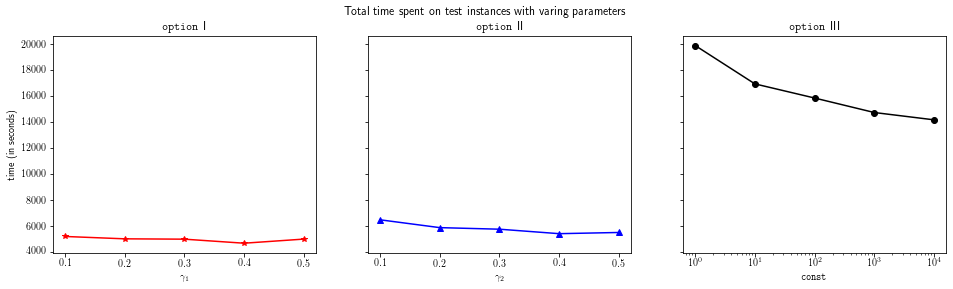

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(16,4))
fig.suptitle('Total time spent on test instances with varing parameters')
ax1.plot([0.1, 0.2, 0.3, 0.4, 0.5], yd_time, 'r-*')
ax1.set_xlabel(r'$\gamma_1$')
ax1.set_ylabel('time (in seconds)')
ax1.set_title(r'\texttt{option} I')
ax2.plot([0.1, 0.2, 0.3, 0.4, 0.5], lee_time, 'b-^')
ax2.set_xlabel(r'$\gamma_2$')
ax2.set_title(r'\texttt{option} II')
ax3.plot([1e0, 1e1, 1e2, 1e3, 1e4], schimdt_time, 'k-o')
ax3.set_xlabel(r'\texttt{const}')
ax3.set_xscale('log')
ax3.set_title(r'\texttt{option} III')
fig.savefig("./natOG/paramter_sensitivity.pdf", dpi=300)

## Morales Plots

In [7]:
schimdt = get_all(logdir='../IPG/test/log', date=date, inexact_type='schimdt', loss='logit', use_ckpt=True, tol = tol, 
        lam_shrink=[0.1, 0.01], group_size=[10, 100], overlap_ratio=[0.1, 0.2, 0.3], excludes=['madelon'], param_lst=[1e0, 1e1, 1e2, 1e3, 1e4])
ppf = PerformanceProfile(schimdt)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
pools = ppf.plot(column='time', show_num=True, options={'ratio_max':4}, plot=False)
print("=================")
schimdt_best = get_best(pools)
print('Best params:', schimdt_best)

schimdt-1.0
 61/72 instances terminate with status:  1
  1/72 instances terminate with status:  4
 10/72 instances terminate with status:  0
schimdt-10.0
 71/72 instances terminate with status:  1
  1/72 instances terminate with status:  4
schimdt-100.0
 72/72 instances terminate with status:  1
schimdt-1000.0
 72/72 instances terminate with status:  1
schimdt-10000.0
 72/72 instances terminate with status:  1
All algorithms failed in 0 instances (failure code -2)
Metrics for failed instances are overwritten with np.inf
After subsetting, 72 instances are kept.
Best params: schimdt-10000.0


In [8]:
lee = get_all(logdir='../IPG/test/log', date=date, inexact_type='lee', loss='logit', use_ckpt=True, tol = tol, 
        lam_shrink=[0.1, 0.01], group_size=[10, 100], overlap_ratio=[0.1, 0.2, 0.3], excludes=['madelon'], param_lst=[0.1, 0.2, 0.3, 0.4, 0.5])
ppf = PerformanceProfile(lee)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
pools = ppf.plot(column='time', show_num=True, options={'ratio_max':4}, plot=False)
print("=================")
lee_best = get_best(pools)
print('Best params:', lee_best)

lee-0.1
 70/72 instances terminate with status:  0
  2/72 instances terminate with status:  4
lee-0.2
 70/72 instances terminate with status:  0
  2/72 instances terminate with status:  4
lee-0.3
 70/72 instances terminate with status:  0
  2/72 instances terminate with status:  4
lee-0.4
 70/72 instances terminate with status:  0
  2/72 instances terminate with status:  4
lee-0.5
 70/72 instances terminate with status:  0
  2/72 instances terminate with status:  4
All algorithms failed in 0 instances (failure code -2)
Metrics for failed instances are overwritten with np.inf
After subsetting, 72 instances are kept.
Best params: lee-0.5


In [9]:
yd = get_all(logdir='../IPG/test/log', date=date, inexact_type='yd', loss='logit', use_ckpt=True, tol = tol, 
        lam_shrink=[0.1, 0.01], group_size=[10, 100], overlap_ratio=[0.1, 0.2, 0.3], excludes=['madelon'], param_lst=[0.1, 0.2, 0.3, 0.4, 0.5])
ppf = PerformanceProfile(yd)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
pools = ppf.plot(column='time', show_num=True, options={'ratio_max':4}, plot=False)
print("=================")
yd_best = get_best(pools)
print('Best params:', yd_best)

yd-0.1
 70/72 instances terminate with status:  0
  2/72 instances terminate with status:  4
yd-0.2
 70/72 instances terminate with status:  0
  2/72 instances terminate with status:  4
yd-0.3
 70/72 instances terminate with status:  0
  2/72 instances terminate with status:  4
yd-0.4
 70/72 instances terminate with status:  0
  2/72 instances terminate with status:  4
yd-0.5
 70/72 instances terminate with status:  0
  2/72 instances terminate with status:  4
All algorithms failed in 0 instances (failure code -2)
Metrics for failed instances are overwritten with np.inf
After subsetting, 72 instances are kept.
Best params: yd-0.4


In [10]:
cols = ['datasetid', 'F', 'time', 'nz']
schimdt_df = schimdt[schimdt_best][cols].copy()
lee_df = lee[lee_best][cols].copy()
yd_df = yd[yd_best][cols].copy()

def pair_wise_comparison(df1, df2, suffixes_lst):
    df12_merged = pd.merge(df1, df2, on='datasetid', 
                           suffixes=(suffixes_lst[0], suffixes_lst[1]), how='left')
    better12_z = np.sum((df12_merged[f'nz{suffixes_lst[0]}'] - df12_merged[f'nz{suffixes_lst[1]}']) > 0 )
    same12_z = np.sum((df12_merged[f'nz{suffixes_lst[0]}'] - df12_merged[f'nz{suffixes_lst[1]}']) == 0 ) 
    worse12_z = np.sum((df12_merged[f'nz{suffixes_lst[0]}'] - df12_merged[f'nz{suffixes_lst[1]}']) < 0 ) 
    
    better12_F = np.sum((df12_merged[f'F{suffixes_lst[0]}'] - df12_merged[f'F{suffixes_lst[1]}']) < -1e-8 )
    same12_F = np.sum(np.abs(df12_merged[f'F{suffixes_lst[0]}'] - df12_merged[f'F{suffixes_lst[1]}']) <=1e-8 ) 
    worse12_F = np.sum((df12_merged[f'F{suffixes_lst[0]}'] - df12_merged[f'F{suffixes_lst[1]}']) > 1e-8 )     

    print(f"For {suffixes_lst[0]}-{suffixes_lst[1]} comparsion:\n==========================")
    print(" In terms final F:")
    print(f"  better:{better12_F} | same:{same12_F} | worse: {worse12_F}")
    print(" In terms #z:")
    print(f"  better:{better12_z} | same:{same12_z} | worse: {worse12_z}")
    return better12_z, same12_z, worse12_z, better12_F, same12_F, worse12_F

In [11]:
pair_wise_comparison(yd_df, lee_df, suffixes_lst=['yd', 'lee'])

For yd-lee comparsion:
 In terms final F:
  better:0 | same:71 | worse: 1
 In terms #z:
  better:0 | same:69 | worse: 3


(0, 69, 3, 0, 71, 1)

In [12]:
pair_wise_comparison(yd_df, schimdt_df, suffixes_lst=['yd', 'schimdt'])

For yd-schimdt comparsion:
 In terms final F:
  better:0 | same:71 | worse: 1
 In terms #z:
  better:3 | same:67 | worse: 2


(3, 67, 2, 0, 71, 1)

In [13]:
pair_wise_comparison(lee_df, schimdt_df, suffixes_lst=['lee', 'schimdt'])

For lee-schimdt comparsion:
 In terms final F:
  better:0 | same:72 | worse: 0
 In terms #z:
  better:6 | same:64 | worse: 2


(6, 64, 2, 0, 72, 0)

All algorithms failed in 0 instances (failure code -2)
Metrics for failed instances are overwritten with np.inf
After subsetting, 72 instances are kept.
yd-0.4 Win:19 | Lose:53
yd-0.4 Win:63 | Lose:9
lee-0.5 Win:66 | Lose:6


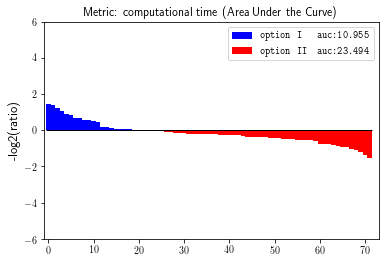

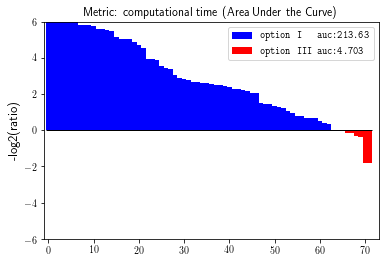

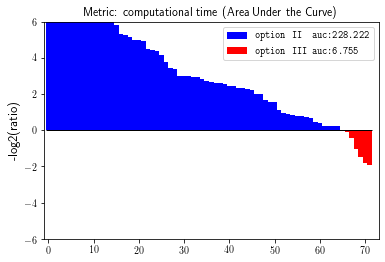

In [14]:
final = {}
final[yd_best] = yd[yd_best]
final[lee_best] = lee[lee_best]
final[schimdt_best] = schimdt[schimdt_best]
ppf = PerformanceProfile(final)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
_ = ppf.plot(column='time',show_num=False, options={'ratio_max':6}, save=True, saveDir='./natOG/', labels=['option I\ \ \ ', 'option II\ \ ', 'option III'])

In [37]:
# yd['yd-0.1'][yd['yd-0.1']['status'] != 0]
# cat ../IPG/test/log/09_10_2021/yd/logit/logfile/0.01_10_0.1_0.1/w8a.txt

In [21]:
# cat ../IPG/test/log/09_10_2021/yd/logit/logfile/0.1_100_0.3_0.1/duke.txt

In [1]:
cat ../IPG/test/log/09_11_2021/yd/logit/logfile/0.1_100_0.3_0.1/duke.txt


       Inexact Proximal Gradient Type Method   (version:0.1 (2021-08-29))  
Problem Summary: Excuted at 2021-9-10 21:50
Dataset:./log/09_11_2021/yd/logit/logfile/0.1_100_0.3_0.1/duke
Data Size:......................................n=44, p=7129
Loss Function:..................................Logistic
Regularizer:....................................Overlapping Group L1
Penalty Parameter:..............................lambda=0.0106
Number of groups:.............................102

Algorithm Parameters:
Termination Conditions: accuracy: 1e-06 | time limits:7200 | iteration limits:10000
Inexact Strategy: yd: gamma:1.000e-01
Lineserch Parameters: eta:1e-05 | xi:0.5 | beta:1.1
Proximal Stepsize update: heuristic
****************************************************************************************************
 Iters.   Obj.    alphak   |  aoptim   its.   Flag  Stepsize  baks    Gap       tarGap    #pz  #pnz | baks    stepsize  |dtaken| |
     0 6.931e-01 1.000e+00 | 6.042e+00    1 desired 

In [2]:
cat ../IPG/test/log/09_10_2021/lee/logit/logfile/0.1_100_0.3_0.1/duke.txt


       Inexact Proximal Gradient Type Method   (version:0.1 (2021-08-29))  
Problem Summary: Excuted at 2021-9-10 13:55
Dataset:./log/09_10_2021/lee/logit/logfile/0.1_100_0.3_0.1/duke
Data Size:......................................n=44, p=7129
Loss Function:..................................Logistic
Regularizer:....................................Overlapping Group L1
Penalty Parameter:..............................lambda=0.0106
Number of groups:.............................102

Algorithm Parameters:
Termination Conditions: accuracy: 1e-06 | time limits:7200 | iteration limits:10000
Inexact Strategy: lee: gamma:1.000e-01
Lineserch Parameters: eta:1e-05 | xi:0.5 | beta:1.1
Proximal Stepsize update: heuristic
****************************************************************************************************
 Iters.   Obj.    alphak   |  aoptim   its.   Flag  Stepsize  baks    Gap       tarGap    #pz  #pnz | baks    stepsize  |dtaken| |
     0 6.931e-01 1.000e+00 | 6.042e+00    1 desire

In [33]:
ls ../IPG/test/log/09_10_2021/lee/logit/ckpt/1e-06/0.1_10_0.3_0.1/ 

a9a_info.npy           duke_info.npy  mushrooms_info.npy
colon_cancer_info.npy  leu_info.npy


In [25]:
path = "../IPG/test/log/09_10_2021/lee/logit/ckpt/1e-06/0.01_100_0.1_0.1/w8a_info.npy"
np.load(path, allow_pickle="True").item()['optim'], np.load(path, allow_pickle="True").item()['status']

(7.485627446075131e-07, 404)

In [15]:
path = "../IPG/test/log/09_10_2021/lee/logit/ckpt/1e-05/0.01_100_0.1_0.1/w8a_info.npy"
np.load(path, allow_pickle="True").item()['optim']

6.23955952580761e-06

In [17]:
path = "../IPG/test/log/09_10_2021/lee/logit/ckpt/0.0001/0.01_100_0.1_0.1/w8a_info.npy"
np.load(path, allow_pickle="True").item()['optim']

6.563115869618423e-06

In [35]:
# cat ../IPG/test/log/09_10_2021/yd/logit/logfile/0.01_10_0.1_0.1/a9a.txt

In [17]:
miletone = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
miletone = [i for i in miletone if i >=1e-3]

In [18]:
miletone

[0.1, 0.01, 0.001]